In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

df_train_raw = pd.read_csv('df_train_raw.csv')
df_test_raw = pd.read_csv('df_test_raw.csv')
df_valid_raw = pd.read_csv('df_valid_raw.csv')

df_train_raw.set_index('회원번호', inplace = True)
df_test_raw.set_index('회원번호', inplace = True)
df_valid_raw.set_index('회원번호', inplace = True)

df_train_y = df_train_raw['실질방문월대비평균구매금액']
df_train_x = df_train_raw.drop(['실질방문월대비평균구매금액'], axis = 1, inplace = False)
df_test_y = df_test_raw['실질방문월대비평균구매금액']
df_test_x = df_test_raw.drop(['실질방문월대비평균구매금액'], axis = 1, inplace = False)
df_valid_y = df_valid_raw['실질방문월대비평균구매금액']
df_valid_x = df_valid_raw.drop(['실질방문월대비평균구매금액'], axis = 1, inplace = False)

gb_model = GradientBoostingRegressor(random_state = 1)
gb_model.fit(df_train_x, df_train_y)

print("회원번호 {0} 고객의 예상매출액 : {1}".format(123643008, int(gb_model.predict(df_test_x.loc[:123643008])[0])))
# print("Score on training set : {:.3f}".format(gb_model.score(df_train_x, df_train_y)))
# print("Score on test set : {:.3f}".format(gb_model.score(df_test_x, df_test_y)))
# print("Score on valid set : {:.3f}".format(gb_model.score(df_valid_x, df_valid_y)))


회원번호 123643008 고객의 예상매출액 : 94135


In [88]:
# df_valid_raw.rename(columns = {'양념과가루' : '양념/가루', '평균구매물품수' : '1회당평균구매물품수'}, inplace = True)
# df_valid_raw.to_csv('df_valid_raw.csv', index = True)

In [90]:
# df_train_raw.set_index('회원번호', inplace = True)
# df_test_raw.set_index('회원번호', inplace = True)
# df_valid_raw.set_index('회원번호', inplace = True)

# df_train_y = df_train_raw['실질방문월대비평균구매금액']
# df_train_x = df_train_raw.drop(['실질방문월대비평균구매금액'], axis = 1, inplace = False)
# df_test_y = df_test_raw['실질방문월대비평균구매금액']
# df_test_x = df_test_raw.drop(['실질방문월대비평균구매금액'], axis = 1, inplace = False)
# df_valid_y = df_valid_raw['실질방문월대비평균구매금액']
# df_valid_x = df_valid_raw.drop(['실질방문월대비평균구매금액'], axis = 1, inplace = False)

gb_model = GradientBoostingRegressor(random_state = 1)
gb_model.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_model.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_model.score(df_test_x, df_test_y)))
print("Score on valid set : {:.3f}".format(gb_model.score(df_valid_x, df_valid_y)))


Score on training set : 0.712
Score on test set : 0.503
Score on valid set : 0.589


In [36]:
print(gb_model.predict(df_test_x.iloc[:1]))

[94135.46082043]


In [40]:
df_test_x.loc[:123643008]

,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,총합,1회당평균구매물품수,첫둘간격,둘셋간격,구매기간간격평균
회원번호,,,,,,,,,,,,,,,,,,,,
123643008,0.117647,0.0,0.0,0.0,0.294118,0.058824,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0,0.352941,0.058824,17.0,5.666667,10,9,9.5


In [94]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 777)
rf_model.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_model.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_model.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_model.score(df_valid_x, df_valid_y)))

Score on training set : 0.913
Score on test set : 0.354
Score on valid set : 0.712


In [95]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state = 3)
tree_model.fit(df_train_x, df_train_y)
# training data 설명력
print("Score on training set : {:.3f}".format(tree_model.score(df_train_x, df_train_y)))
# test data 설명력
print("Score on test set : {:.3f}".format(tree_model.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(tree_model.score(df_valid_x, df_valid_y)))

Score on training set : 1.000
Score on test set : -0.591
Score on valid set : 0.790


In [67]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [96]:
concat_data_x = pd.concat([df_train_x, df_test_x, df_valid_x])
concat_data_y = pd.concat([df_train_y, df_test_y, df_valid_y])
concat_data = concat_data_x.merge(concat_data_y, left_index = True, right_index = True, how = 'inner')

reg_data = concat_data.rename(columns = {'양념/가루' : '양념과가루', '1회당평균구매물품수' : '평균구매물품수'})

reg_model = smf.ols(formula = """실질방문월대비평균구매금액 ~ 간식 + 건강+과실+기타+반찬+생활용품+서류+수산+음료+잡곡+주곡+주류+양념과가루+채소+축산물+총합+평균구매물품수+첫둘간격+둘셋간격+구매기간간격평균""", data = reg_data)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:          실질방문월대비평균구매금액   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 07 May 2020   Prob (F-statistic):          7.80e-321
Time:                        13:59:41   Log-Likelihood:                -43269.
No. Observations:                3711   AIC:                         8.658e+04
Df Residuals:                    3692   BIC:                         8.669e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.83e+04   2212.936     12.786      0.0

In [97]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.formula.api as smf


In [99]:
models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

df_test_x_reg = df_test_x.rename(columns = {'양념/가루' : '양념과가루', '1회당평균구매물품수' : '평균구매물품수'})

reg_y_pred = reg_result.predict(df_test_x_reg)

mse.append(mean_squared_error(df_test_y, reg_y_pred))
rmse.append(root_mean_squared_error(df_test_y, reg_y_pred))
mae.append(mean_absolute_error(df_test_y, reg_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, reg_y_pred))


In [101]:
dt_y_pred = tree_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))



In [102]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [103]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [112]:
mse

[564508798.4452504, 1436707931.0494404, 583653736.408076, 448814900.158162]

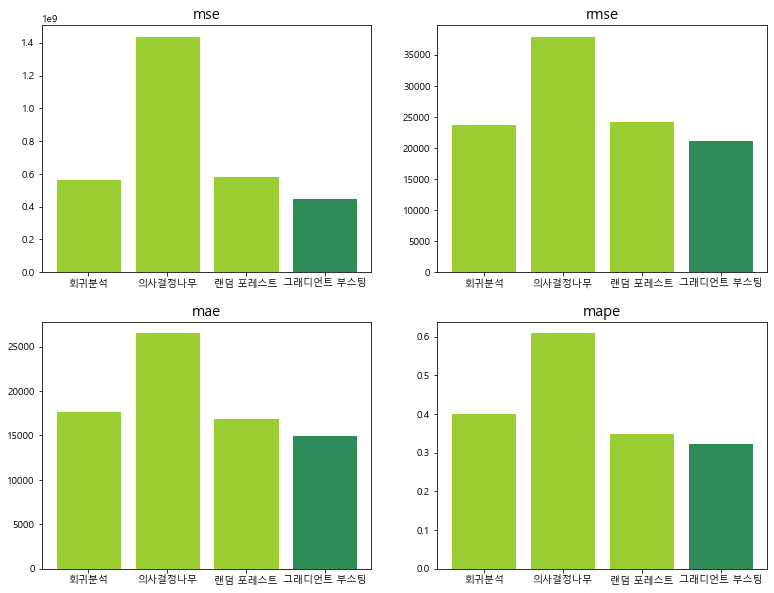

In [125]:
fig, ax = plt.subplots(2,2,figsize = (13,10))

ax1 = ax[0,0].bar(models, mse)
for i in range(3):
    ax1[i].set_color('yellowgreen')
ax1[3].set_color('seagreen')
ax[0,0].set_title("mse").set_fontsize(15)


ax2 = ax[0,1].bar(models, rmse)
for i in range(3):
    ax2[i].set_color('yellowgreen')
ax2[3].set_color('seagreen')
ax[0,1].set_title("rmse").set_fontsize(15)

ax3 = ax[1,0].bar(models, mae)
for i in range(3):
    ax3[i].set_color('yellowgreen')
ax3[3].set_color('seagreen')
ax[1,0].set_title("mae").set_fontsize(15)

ax4 = ax[1,1].bar(models, mape)
for i in range(3):
    ax4[i].set_color('yellowgreen')
ax4[3].set_color('seagreen')
ax[1,1].set_title("mape").set_fontsize(15)

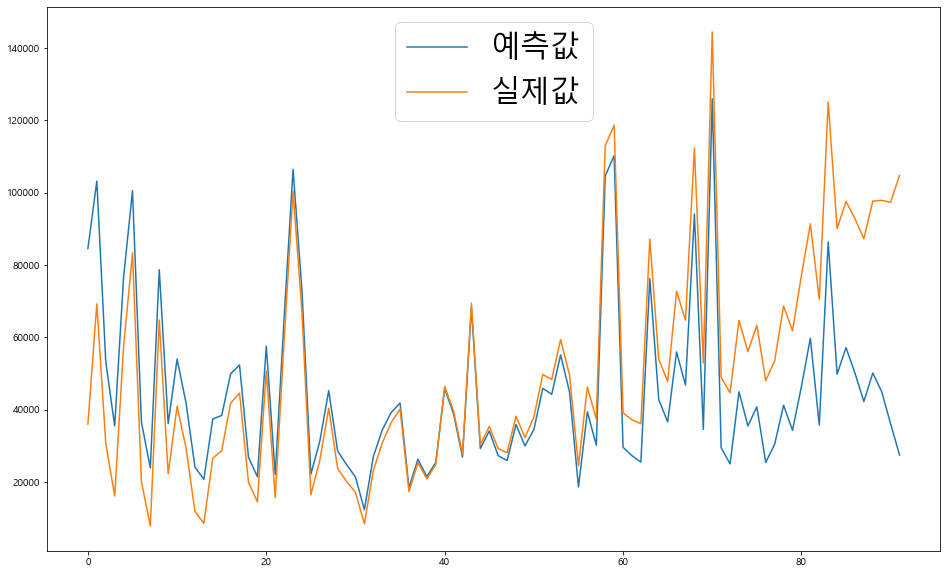

In [139]:
pred = gb_model.predict(df_test_x)
actual = df_test_y

df_result = pd.DataFrame(data = {'pred' : pred, 'actual' : actual})
df_result['차이'] = df_result['actual'] - df_result['pred']

#outlier = df_result[df_result['차이'] > 100000]

# df_train_y_outlierX = df_train_y[~(df_train_y.index.isin(outlier.index))]
# df_train_x_outlierX = df_train_x[~(df_train_x.index.isin(outlier.index))]

# print(df_train_x.shape)
# print(df_train_x_outlierX.shape)
df_result.sort_values('차이', ascending = True, inplace = True)
df_result.reset_index(drop = True, inplace = True)

plt.figure(figsize = (16,10))
plt.plot(df_result.index, df_result.pred, label = "예측값")
plt.plot(df_result.index, df_result.actual, label = "실제값")
plt.legend(loc = 'upper center', fontsize = 30)
plt.show()

In [140]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
# 한글출력
import matplotlib.font_manager as fm

# font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
# font_name = fm.FontProperties(fname = font_location).get_name()
# matplotlib.rc('font',family = font_name)

mfile_model = pd.read_csv('mfile_model.csv', encoding = 'utf-8')
#mfile.head()
dt_A = pd.read_csv('dt_A.csv')
dt_B = pd.read_csv('dt_B.csv')
dt_C = pd.read_csv('dt_C.csv')
dt_D = pd.read_csv('dt_D.csv')

mfile = pd.read_csv('mfile_model.csv', encoding = 'utf-8')

In [142]:
total4 = pd.read_csv('total4.csv')
mfile_merge = total4.merge(mfile.drop(['조합원상태','구매금액'], axis = 1), on = '회원번호', how = 'inner')
mfile_merge

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
1,2018-01-02,220954944,정상회원,채소,잎/줄기채소,적양배추,적양배추(1통:600g이상),1.0,4212.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
2,2018-01-02,220954944,정상회원,수산,해조,김,구운김밥김(10장),1.0,3446.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
3,2018-01-02,220954944,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),2.0,14932.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
4,2018-01-02,220954944,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290674,2018-10-30,1644957952,정상회원,반찬,두부/유부,두부,두부(1모:420g)-쿠폰북행사,1.0,3446.0,매장D,...,42.0,0,0,0,40대,수지구,신봉동,0,1,1
290675,2018-10-30,1644957952,정상회원,간식,떡,가래떡,떡볶이떡(유기/500g),1.0,6892.0,매장D,...,42.0,0,0,0,40대,수지구,신봉동,0,1,1
290676,2018-10-30,670223872,정상회원,음료,음료,두유,검은콩두유(160ml*5봉),6.0,63750.0,매장D,...,55.0,0,0,0,50대,기타,기타,0,1,1
290677,2018-10-31,1046214208,정상회원,서류,감자,감자,감자(1kg),1.0,4977.0,매장D,...,42.0,0,0,0,40대,수지구,성복동,0,1,1


In [195]:
vip = mfile_merge[mfile_merge['Gold_member'] == 1]
#vip[vip['회원번호'].isin(concat_data.index)]['회원번호'].unique()
new = mfile_merge[mfile_merge['회원번호'].isin(df_test_x.index)]
len(new['회원번호'].unique())

92

In [147]:
vip['상태'] = "vip"
new['상태'] = "new"
df_vip_new = pd.concat([vip, new])
df_vip_new

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대,상태
905,2018-01-02,1019647424,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,vip
906,2018-01-02,1019647424,정상회원,축산물,유제품,요구르트,플레인요구르트(범산/450ml),1.0,7849.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,vip
907,2018-01-02,1019647424,정상회원,채소,잎/줄기채소,미나리,한재미나리(200g),1.0,6700.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,vip
908,2018-01-02,1019647424,정상회원,수산,수산가공,젓갈/액젓,창난젓(250g),1.0,13401.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,vip
909,2018-01-03,1019647424,정상회원,수산,건어물,오징어류,오징어채(200g),1.0,17038.0,매장A,...,0,1,1,50대,수지구,동천동,0,135,1,vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290619,2018-10-17,1641455680,정상회원,간식,밀가공,간편조리면,비빔냉면(420g/2인분),1.0,8998.0,매장D,...,0,0,0,40대,수지구,신봉동,0,3,1,new
290620,2018-10-17,1641455680,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403.0,매장D,...,0,0,0,40대,수지구,신봉동,0,3,1,new
290621,2018-10-17,1641455680,정상회원,간식,밀가공,만두,고기만두(500g),1.0,10338.0,매장D,...,0,0,0,40대,수지구,신봉동,0,3,1,new
290622,2018-10-22,1641455680,정상회원,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829.0,매장D,...,0,0,0,40대,수지구,신봉동,0,3,1,new


In [151]:
df_vip_new.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', '월', '요일', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '연령대', '구', '동', '연령60이상', '방문횟수',
       '연령대_4560대', '상태'],
      dtype='object')

In [153]:
memberA = pd.read_csv('memberA.csv')
memberB = pd.read_csv('memberB.csv')
memberC = pd.read_csv('memberC.csv')
memberD = pd.read_csv('memberD.csv')

In [158]:
member = pd.concat([memberA, memberB, memberC, memberD])
member.set_index('회원번호', inplace = True)
df_vip_new.set_index('회원번호', inplace = True)
vip_new = df_vip_new.merge(member[['거리']], left_index = True, right_index = True, how = 'inner')
vip_new

,공급일자,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,...,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대,상태,거리
회원번호,,,,,,,,,,,,,,,,,,,,,
20588608,2018-01-06,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장A,NaN,...,1,1,50대,수지구,풍덕천동,0,110,1,vip,7
20588608,2018-01-06,정상회원,채소,뿌리채소,월동무,월동무(1.2kg이상),1.0,3733.0,매장A,NaN,...,1,1,50대,수지구,풍덕천동,0,110,1,vip,7
20588608,2018-01-06,정상회원,축산물,소,한우,한우분쇄육(300g/국내산),1.0,24505.0,매장A,NaN,...,1,1,50대,수지구,풍덕천동,0,110,1,vip,7
20588608,2018-01-11,정상회원,축산물,소,한우,한우국거리(300g/국내산),1.0,32162.0,매장A,NaN,...,1,1,50대,수지구,풍덕천동,0,110,1,vip,7
20588608,2018-01-15,정상회원,간식,떡,즉석떡,절편(170g),1.0,3829.0,매장A,NaN,...,1,1,50대,수지구,풍덕천동,0,110,1,vip,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641455680,2018-10-24,정상회원,반찬,두부/유부,두부,순두부(300g),2.0,3829.0,매장D,NaN,...,0,0,40대,수지구,신봉동,0,3,1,new,2
1641643136,2018-10-25,정상회원,수산,생물수산,어류/연체류,생물가자미(200g),2.0,37523.0,매장C,NaN,...,0,0,40대,수지구,동천동,0,3,1,new,7
1641643136,2018-10-31,정상회원,간식,빵,"케이크,롤,선물",우리밀롤케이크(600g),1.0,21059.0,매장C,NaN,...,0,0,40대,수지구,동천동,0,3,1,new,7


In [161]:
vip_new.columns

Index(['공급일자', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량', '구매금액',
       '구매매장', '반품_원거래일자', '구매시각', '월', '요일', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '연령대', '구', '동', '연령60이상', '방문횟수',
       '연령대_4560대', '상태', '거리'],
      dtype='object')

In [191]:
# print(vip_new.groupby(['상태'])['구매금액'].mean())
# print(vip_new.groupby(['상태'])['방문횟수','구매금액'].mean())
# print(vip_new.groupby(['상태'])['거리'].mean())
vip_group = vip_new.groupby(['회원번호'])['구매금액'].sum()
vip_purchase = pd.DataFrame(vip_group)
vip_purchase

,구매금액
회원번호,
20588608,2840191.0
22270144,2450202.0
38588096,3054321.0
38959296,2342051.0
48638336,4705219.0
...,...
1639254464,38212.0
1640117504,38000.0
1640149056,87201.0


In [196]:
vip2 = vip_purchase.merge(member[['거리']], left_index = True, right_index = True, how = 'inner')
vip3 = vip2.merge(new_customer[['최초방문월']], left_index = True, right_index = True, how = 'inner')
vip4 = vip3.merge(member[['방문횟수']], left_index = True, right_index = True, how = 'inner')
vip4

,구매금액,거리,최초방문월,방문횟수
회원번호,,,,
20588608,2840191.0,7,1,110
22270144,2450202.0,16,1,122
38588096,3054321.0,7,1,88
38959296,2342051.0,2,1,168
48638336,4705219.0,2,1,147
...,...,...,...,...
1639254464,38212.0,8,10,3
1640117504,38000.0,2,10,3
1640149056,87201.0,4,10,3


In [197]:
vip4['월평균구매금액'] = vip4['구매금액'] / (11 - vip4['최초방문월'])
vip4['월평균방문횟수'] = vip4['방문횟수'] / (11 - vip4['최초방문월'])
vip4

,구매금액,거리,최초방문월,방문횟수,월평균구매금액,월평균방문횟수
회원번호,,,,,,
20588608,2840191.0,7,1,110,284019.1,11.0
22270144,2450202.0,16,1,122,245020.2,12.2
38588096,3054321.0,7,1,88,305432.1,8.8
38959296,2342051.0,2,1,168,234205.1,16.8
48638336,4705219.0,2,1,147,470521.9,14.7
...,...,...,...,...,...,...
1639254464,38212.0,8,10,3,38212.0,3.0
1640117504,38000.0,2,10,3,38000.0,3.0
1640149056,87201.0,4,10,3,87201.0,3.0


In [203]:
state = df_vip_new[['상태']].reset_index().drop_duplicates()
state.set_index('회원번호', inplace = True)

In [212]:
vip5 = vip4.merge(state[['상태']], left_index = True, right_index = True, how = 'left')
vip6 = vip5.merge(member[['모바일알람여부']], left_index = True, right_index = True, how = 'left')
vip_member = vip6[vip6['상태'] == "vip"]
new_member = vip6[vip6['상태'] == "new"]
new_member

,구매금액,거리,최초방문월,방문횟수,월평균구매금액,월평균방문횟수,상태,모바일알람여부
회원번호,,,,,,,,
123643008,112375.0,17,10,3,112375.0,3.0,new,0
168114624,16942.0,17,9,3,8471.0,1.5,new,0
177064256,237387.0,7,9,3,118693.5,1.5,new,0
183465600,23739.0,13,10,4,23739.0,4.0,new,0
200774656,92657.0,10,9,9,46328.5,4.5,new,0
...,...,...,...,...,...,...,...,...
1639254464,38212.0,8,10,3,38212.0,3.0,new,0
1640117504,38000.0,2,10,3,38000.0,3.0,new,0
1640149056,87201.0,4,10,3,87201.0,3.0,new,0


In [207]:
vip5.groupby(['상태'])['월평균구매금액','월평균방문횟수','거리'].mean()

,월평균구매금액,월평균방문횟수,거리
상태,,,
new,50014.152174,2.625000,7.663043
vip,241820.900271,10.162385,3.839024


In [210]:
member[member.index.isin(vip_member.index)].groupby(['배송서비스신청여부','모바일알람여부'])['모바일알람여부'].count().unstack()

모바일알람여부,0,1
배송서비스신청여부,,
0,48,157


In [211]:
member[member.index.isin(new_member.index)].groupby(['배송서비스신청여부','모바일알람여부'])['모바일알람여부'].count().unstack()

모바일알람여부,0,1
배송서비스신청여부,,
0,88,4


In [216]:
vip_price = vip_member['월평균구매금액'].mean()
vip_visit = vip_member['월평균방문횟수'].mean()
vip_distance = vip_member['거리'].mean()

print(len(new_member[new_member['월평균구매금액'] >= vip_price/2]))
print(len(new_member[new_member['월평균방문횟수'] >= vip_visit/2]))
print(len(new_member[new_member['거리'] < vip_distance]))

2
3
32


241820.90027100273

In [224]:
new_member['예상월평균구매금액'] = pred

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [226]:
sum(pred > vip_price/2)

1

In [227]:
member

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,...,음료,잡곡,주곡,주류,채소,축산물,주말,평일,1회당평균구매물품수,거리
회원번호,,,,,,,,,,,,,,,,,,,,,
1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,...,0.000000,0.000000,0.000000,0.0,0.076923,0.153846,0.250000,0.750000,3.250000,3
1000491648,1,0,37.0,0,0,0,30대,663152.0,수지구,동천동,...,0.128617,0.000000,0.000000,0.0,0.176849,0.192926,0.343750,0.656250,1.943750,3
1000508352,1,0,35.0,0,0,0,30대,7083.0,기흥구,상하동,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,22
1000577024,1,0,47.0,0,0,0,40대,218435.0,기타,기타,...,0.631579,0.052632,0.000000,0.0,0.000000,0.105263,0.000000,1.000000,6.333333,17
1000796032,1,0,40.0,0,0,0,40대,117067.0,수지구,동천동,...,0.166667,0.166667,0.083333,0.0,0.000000,0.000000,0.333333,0.666667,2.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997909952,1,0,47.0,0,0,0,40대,139465.0,분당구,중동,...,0.062500,0.000000,0.000000,0.0,0.187500,0.187500,0.285714,0.714286,1.142857,20
998583680,1,0,43.0,0,0,0,40대,45276.0,서울 강남구,기타,...,0.250000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,1.000000,2.000000,29
998990144,1,0,40.0,0,0,0,40대,11486.0,수지구,신봉동,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,2.000000,2


# 가중치 뽑자

In [229]:
mfile = mfile_merge.set_index('회원번호')
vip_new = mfile.merge(member[['거리']], left_index = True, right_index = True, how = 'inner')
mfile_group = mfile.groupby(['회원번호'])['구매금액'].sum()
mfile_purchase = pd.DataFrame(mfile_group)

mfile2 = mfile_purchase.merge(member[['거리']], left_index = True, right_index = True, how = 'inner')
mfile3 = mfile2.merge(new_customer[['최초방문월']], left_index = True, right_index = True, how = 'inner')
mfile4 = mfile3.merge(member[['방문횟수']], left_index = True, right_index = True, how = 'inner')

mfile4['월평균구매금액'] = mfile4['구매금액'] / (11 - mfile4['최초방문월'])
mfile4['월평균방문횟수'] = mfile4['방문횟수'] / (11 - mfile4['최초방문월'])

mfile5 = mfile4.merge(state[['상태']], left_index = True, right_index = True, how = 'left')
mfile6 = mfile5.merge(member[['모바일알람여부']], left_index = True, right_index = True, how = 'left')

mfile6['상태'].fillna("normal", inplace = True)
mfile6

,구매금액,거리,최초방문월,방문횟수,월평균구매금액,월평균방문횟수,상태,모바일알람여부
회원번호,,,,,,,,
18613824,21059.0,31,7,1,5264.750000,0.250000,normal,0
18764160,86533.0,20,1,7,8653.300000,0.700000,normal,0
18792000,33311.0,16,4,1,4758.714286,0.142857,normal,0
18942336,560920.0,7,1,12,56092.000000,1.200000,normal,0
18949760,2776.0,7,9,1,1388.000000,0.500000,normal,0
...,...,...,...,...,...,...,...,...
1644705536,22973.0,7,10,1,22973.000000,1.000000,normal,0
1644772352,85000.0,4,10,1,85000.000000,1.000000,normal,0
1644957952,25079.0,2,10,1,25079.000000,1.000000,normal,0


In [231]:
mfile6['상태'].unique()

array(['normal', 'vip', 'new'], dtype=object)

No handles with labels found to put in legend.


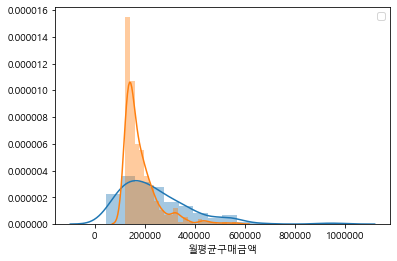

In [297]:
normal_people = mfile6[mfile6['상태'] != "vip"]
normal_p = normal_people[normal_people['월평균구매금액'] > 120000]

sns.distplot(mfile6[mfile6['상태'] == "vip"]['월평균구매금액'])
sns.distplot(normal_p['월평균구매금액'][:300])
plt.legend()

No handles with labels found to put in legend.


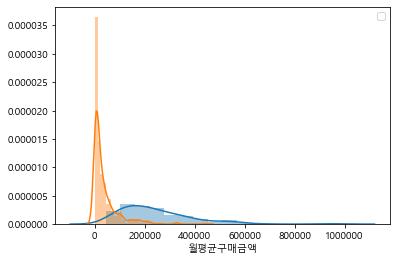

In [291]:
sns.distplot(mfile6[mfile6['상태'] == "vip"]['월평균구매금액'])
sns.distplot(mfile6[mfile6['상태'] != "vip"]['월평균구매금액'])
plt.legend()

In [240]:
import scipy.stats as stats

t_result = stats.ttest_ind(mfile6[mfile6['상태'] == "vip"]['월평균구매금액'],
                           mfile6[mfile6['상태'] != "vip"]['월평균구매금액'])

t_price,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature 월평균구매금액")
print("t : %.3f" %t_price)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(mfile6[mfile6['상태'] == "vip"]['월평균방문횟수'],
                           mfile6[mfile6['상태'] != "vip"]['월평균방문횟수'])

t_visit,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature 월평균방문횟수")
print("t : %.3f" %t_visit)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(mfile6[mfile6['상태'] == "vip"]['거리'],
                           mfile6[mfile6['상태'] != "vip"]['거리'])

t_distance,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature 거리")
print("t : %.3f" %t_distance)
print("p-value : %.3f" %p)

t_result = stats.ttest_ind(mfile6[mfile6['상태'] == "vip"]['모바일알람여부'],
                           mfile6[mfile6['상태'] != "vip"]['모바일알람여부'])

t_alarm,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test for Feature 모바일알람여부")
print("t : %.3f" %t_alarm)
print("p-value : %.3f" %p)

2 sample t-test for Feature 월평균구매금액
t : 67.765
p-value : 0.000
2 sample t-test for Feature 월평균방문횟수
t : 85.988
p-value : 0.000
2 sample t-test for Feature 거리
t : -7.753
p-value : 0.000
2 sample t-test for Feature 모바일알람여부
t : 39.482
p-value : 0.000


In [268]:
weight = [t_price, t_distance, t_alarm]
weight

[67.765, -7.753, 39.482]

In [239]:
print("월평균구매금액 vip 평균 : ", mfile6[mfile6['상태'] == "vip"]['월평균구매금액'].mean())
print("월평균구매금액 normal 평균 : ",mfile6[mfile6['상태'] != "vip"]['월평균구매금액'].mean())
print("월평균방문횟수 vip 평균 : ", mfile6[mfile6['상태'] == "vip"]['월평균방문횟수'].mean())
print("월평균방문횟수 normal 평균 : ",mfile6[mfile6['상태'] != "vip"]['월평균방문횟수'].mean())
print("거리 vip 평균 : ", mfile6[mfile6['상태'] == "vip"]['거리'].mean())
print("거리 normal 평균 : ",mfile6[mfile6['상태'] != "vip"]['거리'].mean())
print("모바일알람여부 vip 평균 : ", mfile6[mfile6['상태'] == "vip"]['모바일알람여부'].mean())
print("모바일알람여부 normal 평균 : ",mfile6[mfile6['상태'] != "vip"]['모바일알람여부'].mean())

월평균구매금액 vip 평균 :  241820.90027100273
월평균구매금액 normal 평균 :  27950.486875954713
월평균방문횟수 vip 평균 :  10.162384823848235
월평균방문횟수 normal 평균 :  1.2695190351581105
거리 vip 평균 :  3.8390243902439023
거리 normal 평균 :  7.950516009526329
모바일알람여부 vip 평균 :  0.7658536585365854
모바일알람여부 normal 평균 :  0.06553762018170592


In [236]:
print(mfile6[mfile6['상태'] == "vip"]['월평균방문횟수'].mean())
print(mfile6[mfile6['상태'] != "vip"]['월평균방문횟수'].mean())

10.162384823848235
1.2695190351581105


In [237]:
print(mfile6[mfile6['상태'] == "vip"]['거리'].mean())
print(mfile6[mfile6['상태'] != "vip"]['거리'].mean())

3.8390243902439023
7.950516009526329


In [238]:
print(mfile6[mfile6['상태'] == "vip"]['모바일알람여부'].mean())
print(mfile6[mfile6['상태'] != "vip"]['모바일알람여부'].mean())

0.7658536585365854
0.06553762018170592


In [266]:
test = new_member[['월평균구매금액','월평균방문횟수','거리','모바일알람여부']]
test['price'] = 0.0
#test['visit'] = 0.0
test['distance'] = 0.0
for i in test.index:
    test['price'][i] = (test['월평균구매금액'][i] - min(test['월평균구매금액'])) / (max(test['월평균구매금액']) - min(test['월평균구매금액']))
#    test['visit'][i] = (test['월평균방문횟수'][i] - min(test['월평균방문횟수'])) / (max(test['월평균방문횟수']) - min(test['월평균방문횟수']))
    test['distance'][i] = (test['거리'][i] - min(test['거리'])) / (max(test['거리']) - min(test['거리']))
#    test['alarm'][i] = (test['모바일알람여부'][i] - min(test['모바일알람여부'])) / (max(test['모바일알람여부']) - min(test['모바일알람여부']))
test

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pan

,월평균구매금액,월평균방문횟수,거리,모바일알람여부,price,distance
회원번호,,,,,,
123643008,112375.0,3.0,17,0,0.771536,0.517241
168114624,8471.0,1.5,17,0,0.032348,0.517241
177064256,118693.5,1.5,7,0,0.816487,0.172414
183465600,23739.0,4.0,13,0,0.140967,0.379310
200774656,46328.5,4.5,10,0,0.301672,0.275862
...,...,...,...,...,...,...
1639254464,38212.0,3.0,8,0,0.243930,0.206897
1640117504,38000.0,3.0,2,0,0.242422,0.000000
1640149056,87201.0,3.0,4,0,0.592445,0.068966


In [260]:
sum(test['alarm'])

4

In [267]:
test['alarm'] = test['모바일알람여부']
test.columns[4:]

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['price', 'distance', 'alarm'], dtype='object')

In [269]:
col = test.columns[4:]
test['vip지수'] = 0.0
for i in range(3):
    test['vip지수'] += test[col[i]] * weight[i]
test

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,월평균구매금액,월평균방문횟수,거리,모바일알람여부,price,distance,alarm,vip지수
회원번호,,,,,,,,
123643008,112375.0,3.0,17,0,0.771536,0.517241,0,48.272985
168114624,8471.0,1.5,17,0,0.032348,0.517241,0,-1.818109
177064256,118693.5,1.5,7,0,0.816487,0.172414,0,53.992520
183465600,23739.0,4.0,13,0,0.140967,0.379310,0,6.611823
200774656,46328.5,4.5,10,0,0.301672,0.275862,0,18.304033
...,...,...,...,...,...,...,...,...
1639254464,38212.0,3.0,8,0,0.243930,0.206897,0,14.925838
1640117504,38000.0,3.0,2,0,0.242422,0.000000,0,16.427703
1640149056,87201.0,3.0,4,0,0.592445,0.068966,0,39.612331


In [270]:
test['vip등급'] = ""
test['vip등급'] = pd.qcut(test['vip지수'], 5, labels=["F등급","D등급","C등급","B등급","A등급"])
test

,월평균구매금액,월평균방문횟수,거리,모바일알람여부,price,distance,alarm,vip지수,vip등급
회원번호,,,,,,,,,
123643008,112375.0,3.0,17,0,0.771536,0.517241,0,48.272985,A등급
168114624,8471.0,1.5,17,0,0.032348,0.517241,0,-1.818109,F등급
177064256,118693.5,1.5,7,0,0.816487,0.172414,0,53.992520,A등급
183465600,23739.0,4.0,13,0,0.140967,0.379310,0,6.611823,F등급
200774656,46328.5,4.5,10,0,0.301672,0.275862,0,18.304033,C등급
...,...,...,...,...,...,...,...,...,...
1639254464,38212.0,3.0,8,0,0.243930,0.206897,0,14.925838,D등급
1640117504,38000.0,3.0,2,0,0.242422,0.000000,0,16.427703,C등급
1640149056,87201.0,3.0,4,0,0.592445,0.068966,0,39.612331,A등급


In [271]:
test.groupby(['vip등급'])['alarm'].count()

vip등급
F등급    19
D등급    18
C등급    18
B등급    18
A등급    19
Name: alarm, dtype: int64

In [265]:
test.to_csv('신규고객으로잠재vip등급화.csv', index = True)
test2 = pd.read_csv('신규고객으로잠재vip등급화.csv')
test2.set_index('회원번호', inplace = True)
test2

,월평균구매금액,월평균방문횟수,거리,모바일알람여부,price,visit,distance,alarm,vip지수,vip등급
회원번호,,,,,,,,,,
123643008,112375.0,3.0,17,0,0.771536,0.272727,0.517241,0,71.724258,A등급
168114624,8471.0,1.5,17,0,0.032348,0.000000,0.517241,0,-1.818109,F등급
177064256,118693.5,1.5,7,0,0.816487,0.000000,0.172414,0,53.992520,B등급
183465600,23739.0,4.0,13,0,0.140967,0.454545,0.379310,0,45.697277,B등급
200774656,46328.5,4.5,10,0,0.301672,0.545455,0.275862,0,65.206578,A등급
...,...,...,...,...,...,...,...,...,...,...
1639254464,38212.0,3.0,8,0,0.243930,0.272727,0.206897,0,38.377110,C등급
1640117504,38000.0,3.0,2,0,0.242422,0.272727,0.000000,0,39.878976,C등급
1640149056,87201.0,3.0,4,0,0.592445,0.272727,0.068966,0,63.063603,B등급


In [275]:
print("월평균구매금액 max : ", test['월평균구매금액'].max())
print("월평균구매금액 min : ",test['월평균구매금액'].min())
print("거리 max : ", test['거리'].max())
print("거리 min : ",test['거리'].min())
print("A 최소 : ", test[test['vip등급'] == "A등급"]['vip지수'].min())
print("B 최소 : ", test[test['vip등급'] == "B등급"]['vip지수'].min())
print("C 최소 : ", test[test['vip등급'] == "C등급"]['vip지수'].min())
print("D 최소 : ", test[test['vip등급'] == "D등급"]['vip지수'].min())
print("F 최소 : ", test[test['vip등급'] == "F등급"]['vip지수'].min())

월평균구매금액 max :  144489.0
월평균구매금액 min :  3924.0
거리 max :  31
거리 min :  2
A 최소 :  38.96992808824485
B 최소 :  23.092306876681178
C 최소 :  15.422519701279441
D 최소 :  9.33286891019862
F 최소 :  -1.8181085643284431


In [276]:
weight

[67.765, -7.753, 39.482]

In [283]:
# input_data는 월평균예상구매금액(모델링으로 예측한 값), 거리, 모바일알람여부 순으로 입력
input_data = [100000, 7, 1]
weight = [67.765, -7.753, 39.482]
norm_purchase = (input_data[0] - 3924.0) / (144489.0 - 3924.0)
norm_distance = (input_data[1] - 2) / (31 - 2)
norm_data = [norm_purchase, norm_distance, input_data[2]]
vip_score = 0.0
for i in range(3):
    vip_score += norm_data[i] * weight[i]

vip_rank = ""
if vip_score >= 38.96992808824485:
    vip_rank = "A등급"
elif vip_score >= 23.092306876681178:
    vip_rank = "B등급"
elif vip_score >= 15.422519701279441:
    vip_rank = "C등급"
elif vip_score >= 9.33286891019862:
    vip_rank = "D등급"
else:
    vip_rank = "F등급"
print("이 회원의 예상 vip 등급은", vip_rank, "입니다.")

이 회원의 예상 vip 등급은 A등급 입니다.


In [162]:
new_customer = mfile_merge.groupby(['회원번호','월'])['방문횟수'].count().unstack()
new_customer.fillna(0, inplace = True)
new_customer['최초방문월'] = 0
temp = 0
for i in new_customer.index:
    temp += 1
    for j in new_customer.columns:
        if new_customer.loc[i][j] != 0:
            new_customer['최초방문월'][i] = j
            
            break
    if temp % 100 == 0:
        print(temp, i, new_customer['최초방문월'][i])

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


100 46568896 1
200 58074240 1
300 67448896 6
400 82805440 3
500 98258496 2
600 116389760 1
700 130614144 1
800 149359744 2
900 164846208 7
1000 182075456 9
1100 195084160 4
1200 208276608 3
1300 224934208 1
1400 240088448 1
1500 254585664 1
1600 267705728 1
1700 278283072 10
1800 292980736 1
1900 309747840 1
2000 324393536 10
2100 345644736 10
2200 358824192 7
2300 377644032 1
2400 392336128 8
2500 405129536 1
2600 418687616 3
2700 433517056 4
2800 445122624 1
2900 460293568 2
3000 472619264 4
3100 480201024 9
3200 514145408 1
3300 538882176 1
3400 552670400 3
3500 563704320 3
3600 575291328 1
3700 588619264 1
3800 601099008 10
3900 613677120 3
4000 629367744 8
4100 643304448 2
4200 657367360 1
4300 670350080 4
4400 682035456 1
4500 692625792 1
4600 706274816 5
4700 720337728 1
4800 732689408 2
4900 743268608 1
5000 745196992 2
5100 747253440 1
5200 748795776 2
5300 752999616 4
5400 761739520 1
5500 763762560 1
5600 766297856 8
5700 768935232 10
5800 775227072 6
5900 787823744 7
6000 8

In [163]:
new_customer

월,1,2,3,4,5,6,7,8,9,10,최초방문월
회원번호,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
18764160,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1
18792000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
18942336,8.0,4.0,0.0,2.0,0.0,1.0,5.0,8.0,3.0,1.0,1
18949760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
1644705536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10
1644957952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10


In [300]:
mfile_merge.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', '월', '요일', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '연령대', '구', '동', '연령60이상', '방문횟수',
       '연령대_4560대'],
      dtype='object')

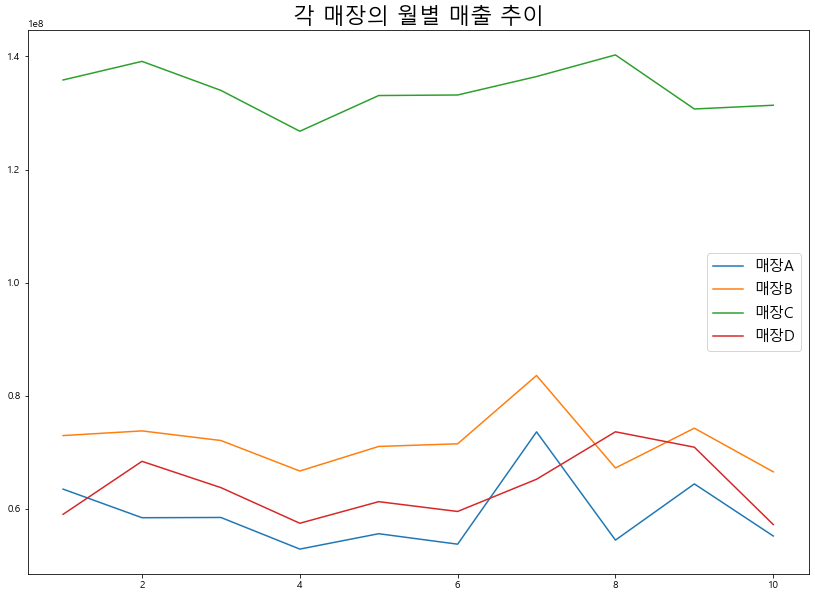

In [309]:
a = mfile_merge.groupby(['월','구매매장'])['구매금액'].sum().unstack()
plt.figure(figsize = (14,10))
plt.plot(a.index, a['매장A'], label = "매장A")
plt.plot(a.index, a['매장B'], label = "매장B")
plt.plot(a.index, a['매장C'], label = "매장C")
plt.plot(a.index, a['매장D'], label = "매장D")
plt.title("각 매장의 월별 매출 추이", fontsize = 22)
plt.legend(loc = 'center right', fontsize = 15)

In [310]:
mfile_merge[mfile_merge['물품소분류'] == "멥쌀"]['물품명'].unique()

array(['칠분도미/유(4kg)-매장용', '백미/유(4kg)-매장용', '백미/유(4kg)-등급:상-매장용',
       '현미/유(2kg)', '칠분도미/유(2kg)', '백미/유(2kg)', '오분도미/유(4kg)-매장용',
       '오분도미/유(8kg)-매장용', '현미/유(4kg)-매장용', '백미/유(8kg)-매장용', '오분도미/유(2kg)',
       '현미/유(8kg)-매장용', '백미/유(1kg)', '백미/유(2kg)-쿠폰북행사', '현미/유(4kg)',
       '오분도미/유(4kg)', '유기쌀선물모음'], dtype=object)